In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액

* 종속변수: conversion  => 고객이 프로모션에 반응 했는가? 1 = yes, 0 = no

In [3]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [4]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [5]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


<Axes: >

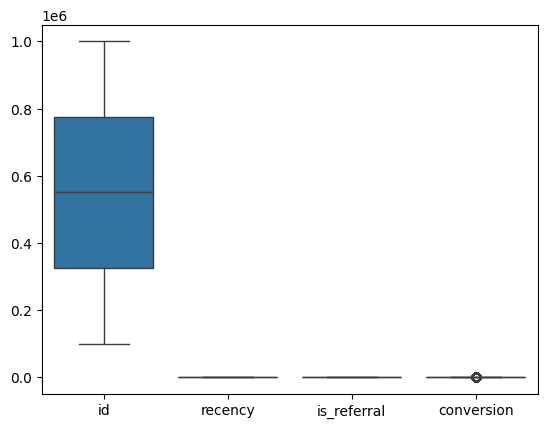

In [6]:
sns.boxplot(mem)

In [7]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [8]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [9]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


<Axes: >

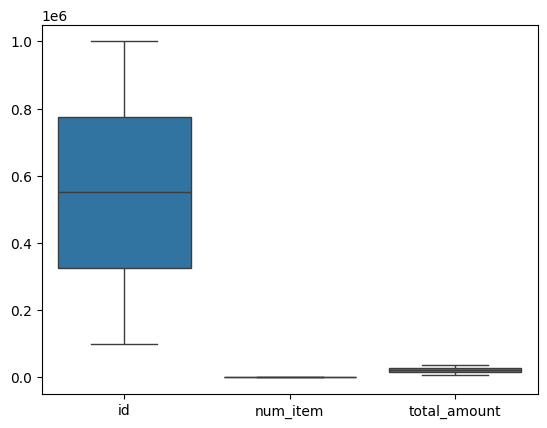

In [10]:
sns.boxplot(tran)

In [11]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [12]:
mem['id'].nunique()

64000

In [13]:
mem['recency'].describe()

count    64000.000000
mean         5.763734
std          3.507592
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: recency, dtype: float64

<Axes: xlabel='recency', ylabel='Count'>

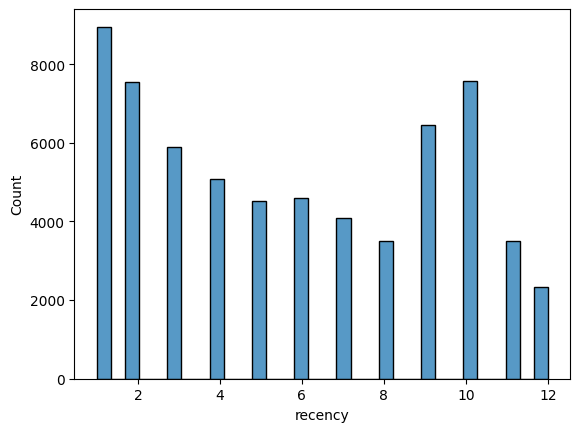

In [14]:
sns.histplot(mem['recency'])

In [15]:
mem['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [16]:
mem['is_referral'].value_counts()

is_referral
1    32144
0    31856
Name: count, dtype: int64

In [17]:
mem['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [18]:
mem['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [19]:
9394 / (9394 +54606)

0.14678125

In [20]:
mem.groupby('recency')['conversion'].value_counts(sort=False)

recency  conversion
1        0             7224
         1             1728
2        0             6197
         1             1340
3        0             4922
         1              982
4        0             4321
         1              756
5        0             3868
         1              642
6        0             3957
         1              648
7        0             3532
         1              546
8        0             3048
         1              447
9        0             5707
         1              734
10       0             6713
         1              852
11       0             3081
         1              423
12       0             2036
         1              296
Name: count, dtype: int64

In [21]:
1728 / (1728+7224)              

0.19302949061662197

In [22]:
mem.groupby('recency')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
recency,,,,,,,,
1,8952.0,0.193029,0.394698,0.0,0.0,0.0,0.0,1.0
2,7537.0,0.177790,0.382361,0.0,0.0,0.0,0.0,1.0
3,5904.0,0.166328,0.372406,0.0,0.0,0.0,0.0,1.0
4,5077.0,0.148907,0.356032,0.0,0.0,0.0,0.0,1.0
5,4510.0,0.142350,0.349448,0.0,0.0,0.0,0.0,1.0
6,4605.0,0.140717,0.347767,0.0,0.0,0.0,0.0,1.0
7,4078.0,0.133889,0.340575,0.0,0.0,0.0,0.0,1.0
8,3495.0,0.127897,0.334023,0.0,0.0,0.0,0.0,1.0
9,6441.0,0.113957,0.317784,0.0,0.0,0.0,0.0,1.0


recency가 짧을 수록 프로모션 성공률이 높다.

In [23]:
mem.groupby('is_referral')['conversion'].value_counts()

is_referral  conversion
0            0             26343
             1              5513
1            0             28263
             1              3881
Name: count, dtype: int64

In [24]:
mem.groupby('is_referral')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
is_referral,,,,,,,,
0,31856.0,0.173060,0.378305,0.0,0.0,0.0,0.0,1.0
1,32144.0,0.120738,0.325828,0.0,0.0,0.0,0.0,1.0


In [25]:
mem.groupby('channel')['conversion'].value_counts()

channel       conversion
Multichannel  0              6429
              1              1333
Phone         0             24458
              1              3563
Web           0             23719
              1              4498
Name: count, dtype: int64

In [26]:
mem.groupby('channel')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
Multichannel,7762.0,0.171734,0.377173,0.0,0.0,0.0,0.0,1.0
Phone,28021.0,0.127155,0.333152,0.0,0.0,0.0,0.0,1.0
Web,28217.0,0.159407,0.366062,0.0,0.0,0.0,0.0,1.0


In [27]:
tran_total = tran.groupby('id')[['num_item', 'total_amount']].sum()
tran_total

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [28]:
tran['id'].nunique()

64000

고객의 총구매개수, 총구매액, 평균구매액 

In [29]:
tran_total['mean_amount'] = tran_total['total_amount'] / tran_total['num_item']
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428.571429
100008,5,26000,5200.000000
100032,8,62000,7750.000000
100036,15,129000,8600.000000
100070,13,85000,6538.461538
...,...,...,...
999932,5,32000,6400.000000
999981,8,91000,11375.000000
999990,9,84000,9333.333333


고객의 방문 빈도

In [30]:
frequency = tran['id'].value_counts(sort=False)

In [31]:
frequency

id
906145    3
184478    1
394235    2
130152    4
940352    1
         ..
233143    5
302540    2
362521    5
536246    4
927617    4
Name: count, Length: 64000, dtype: int64

In [32]:
print(type(frequency))

<class 'pandas.core.series.Series'>


In [33]:
frequency.index

Index([906145, 184478, 394235, 130152, 940352, 872298, 103308, 283516, 101354,
       663001,
       ...
       463254, 220271, 710131, 964015, 881987, 233143, 302540, 362521, 536246,
       927617],
      dtype='int64', name='id', length=64000)

In [34]:
tran_total['frequency'] = frequency

In [35]:
tran_total

,num_item,total_amount,mean_amount,frequency
id,,,,
100001,7,52000,7428.571429,2
100008,5,26000,5200.000000,1
100032,8,62000,7750.000000,3
100036,15,129000,8600.000000,5
100070,13,85000,6538.461538,4
...,...,...,...,...
999932,5,32000,6400.000000,1
999981,8,91000,11375.000000,4
999990,9,84000,9333.333333,3


In [37]:
# merge, join

In [38]:
mem

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0
...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0
63996,547316,5,Urban,1,Phone,0
63997,131575,6,Urban,1,Phone,0
63998,603659,1,Surburban,1,Multichannel,0


In [39]:
mem = mem.set_index('id')

In [40]:
data = mem.join(tran_total)
data

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,104000,7428.571429,4
547316,5,Urban,1,Phone,0,9,89000,9888.888889,5
131575,6,Urban,1,Phone,0,8,61000,7625.000000,2


In [41]:
data

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,104000,7428.571429,4
547316,5,Urban,1,Phone,0,9,89000,9888.888889,5
131575,6,Urban,1,Phone,0,8,61000,7625.000000,2


In [42]:
data.groupby('num_item')['conversion'].value_counts(sort=False)

num_item  conversion
1         0             2167
2         0             2585
          1               64
3         0             3227
          1              139
4         0             3666
          1              258
5         0             4546
          1              343
6         0             3288
          1              458
7         0             3446
          1              616
8         0             3674
          1              655
9         0             3593
          1              624
10        0             3634
          1              690
11        0             3381
          1              693
12        0             3213
          1              663
13        0             3127
          1              552
14        0             2723
          1              586
15        0             2338
          1              547
16        0             1899
          1              515
17        0             1453
          1              475
18        0           

구매량이 22개 이상인 경우 프로모션에 응할 가능성이 높다.

In [43]:
data.groupby('conversion')['total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,54606.0,64648.903051,33453.777907,8000.0,35000.0,63000.0,91000.0,165000.0
1,9394.0,81766.020864,30989.933757,18000.0,57000.0,80000.0,105000.0,184000.0


구매 총 금액과는 크게 관계가 없다.

In [44]:
data.groupby('frequency')['conversion'].value_counts()

frequency  conversion
1          0             10809
2          0             10979
           1              2377
3          0             10902
           1              2418
4          0             10955
           1              2265
5          0             10961
           1              2334
Name: count, dtype: int64

구매 횟수도 크게 상관이 없다.

In [45]:
data.columns

Index(['recency', 'zip_code', 'is_referral', 'channel', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency'],
      dtype='object')

In [46]:
data_corr = data[['recency', 'is_referral', 'conversion',
       'num_item', 'total_amount', 'mean_amount', 'frequency']].corr()

<Axes: >

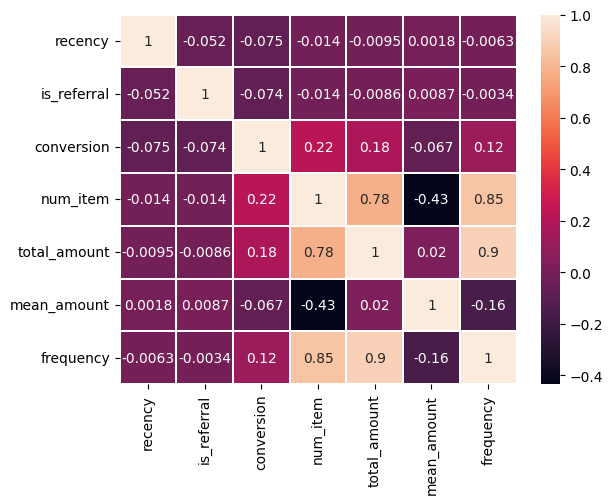

In [47]:
sns.heatmap(data_corr, annot=True, linewidths=0.1)

In [48]:
data.head()

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1


In [49]:
data.groupby('zip_code')['conversion'].value_counts()

zip_code   conversion
Rural      0              7764
           1              1799
Surburban  0             24749
           1              4027
Urban      0             22093
           1              3568
Name: count, dtype: int64

In [50]:
data.groupby('zip_code')['conversion'].mean()

zip_code
Rural        0.188121
Surburban    0.139943
Urban        0.139044
Name: conversion, dtype: float64

시골이 프로모션 참여율이 높다.

In [51]:
data = data.drop(['total_amount', 'frequency'], axis=1)
data

,recency,zip_code,is_referral,channel,conversion,num_item,mean_amount
id,,,,,,,
906145,10,Surburban,0,Phone,0,10,9400.000000
184478,6,Rural,1,Web,0,4,7250.000000
394235,7,Surburban,1,Web,0,8,5125.000000
130152,9,Rural,1,Web,0,7,11857.142857
940352,2,Urban,0,Web,0,3,10333.333333
...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,7428.571429
547316,5,Urban,1,Phone,0,9,9888.888889
131575,6,Urban,1,Phone,0,8,7625.000000


In [52]:
data = pd.get_dummies(data, drop_first=True)
data

,recency,is_referral,conversion,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
id,,,,,,,,,
906145,10,0,0,10,9400.000000,True,False,True,False
184478,6,1,0,4,7250.000000,False,False,False,True
394235,7,1,0,8,5125.000000,True,False,False,True
130152,9,1,0,7,11857.142857,False,False,False,True
940352,2,0,0,3,10333.333333,False,True,False,True
...,...,...,...,...,...,...,...,...,...
838295,10,0,0,14,7428.571429,False,True,False,True
547316,5,1,0,9,9888.888889,False,True,True,False
131575,6,1,0,8,7625.000000,False,True,True,False


# 독립 변수들 간에 단위 차이가 너무 클 때 => 스케일링 필요
* Min-Max scaler: 모든 숫자를 0-1사이의 숫자로 변환 - 데이터 분포의 모양을 그대로 유지
* Standard Scaler: 평균을 0, 표준편차를 1로 하는 정규분포의 형태로 변환 - 데이터 분포 모양이 정규 분포로 바뀜
* Robust Scaler: 사분위수를 이용해서 데이터를 스케일링 - 데이터에 이상값이 있을 때 영향을 받지 않음.


In [53]:
X = data.drop('conversion', axis=1)
y = data['conversion']

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss = StandardScaler()
std_X = ss.fit_transform(X)
std_X

array([[ 1.20775141, -1.00451017,  0.10566371, ..., -0.81811885,
         1.1331378 , -0.88800834],
       [ 0.06735889,  0.99551008, -1.08536763, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       [ 0.35245702,  0.99551008, -0.29134674, ..., -0.81811885,
        -0.8825052 ,  1.12611555],
       ...,
       [ 0.06735889,  0.99551008, -0.29134674, ...,  1.2223163 ,
         1.1331378 , -0.88800834],
       [-1.35813177,  0.99551008,  1.29669505, ..., -0.81811885,
        -0.8825052 , -0.88800834],
       [-1.35813177, -1.00451017,  1.49520028, ..., -0.81811885,
        -0.8825052 ,  1.12611555]])

In [56]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(std_X, y, test_size=0.4, stratify=y, random_state=100)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=100)

In [59]:
from sklearn.neighbors import ㅅ
from sklearn.metrics import accuracy_score, classification_report

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)
pred = knn.predict(X_valid)
print(accuracy_score(y_valid, pred))
print(classification_report(y_valid, pred))
print("="*50, "test", "="*50)
pred_test = knn.predict(X_test)
print(accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))

0.835703125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.31      0.09      0.14      1879

    accuracy                           0.84     12800
   macro avg       0.58      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800

================================================== test ==================================================
0.83578125
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10921
           1       0.32      0.10      0.15      1879

    accuracy                           0.84     12800
   macro avg       0.59      0.53      0.53     12800
weighted avg       0.78      0.84      0.80     12800



In [61]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid)
    print(i, accuracy_score(y_valid, pred))
    print(i, classification_report(y_valid, pred))
    print("="*50, "test", "="*50)
    pred_test = knn.predict(X_test)
    print(i, accuracy_score(y_test, pred_test))
    print(i, classification_report(y_test, pred_test))

1 0.7734375
1               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10921
           1       0.22      0.22      0.22      1879

    accuracy                           0.77     12800
   macro avg       0.54      0.54      0.54     12800
weighted avg       0.77      0.77      0.77     12800

================================================== test ==================================================
1 0.776484375
1               precision    recall  f1-score   support

           0       0.87      0.87      0.87     10921
           1       0.23      0.23      0.23      1879

    accuracy                           0.78     12800
   macro avg       0.55      0.55      0.55     12800
weighted avg       0.77      0.78      0.78     12800

2 0.843203125
2               precision    recall  f1-score   support

           0       0.86      0.98      0.91     10921
           1       0.32      0.06      0.10      1879

    accuracy                 

11 0.850234375
11               precision    recall  f1-score   support

           0       0.86      0.99      0.92     10921
           1       0.42      0.05      0.10      1879

    accuracy                           0.85     12800
   macro avg       0.64      0.52      0.51     12800
weighted avg       0.79      0.85      0.80     12800

12 0.853203125
12               precision    recall  f1-score   support

           0       0.86      0.99      0.92     10921
           1       0.50      0.03      0.06      1879

    accuracy                           0.85     12800
   macro avg       0.68      0.51      0.49     12800
weighted avg       0.80      0.85      0.79     12800

================================================== test ==================================================
12 0.853359375
12               precision    recall  f1-score   support

           0       0.86      0.99      0.92     10921
           1       0.51      0.04      0.07      1879

    accuracy         

22 0.854375
22               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.62      0.02      0.04      1879

    accuracy                           0.85     12800
   macro avg       0.74      0.51      0.48     12800
weighted avg       0.82      0.85      0.79     12800

================================================== test ==================================================
22 0.855078125
22               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.66      0.03      0.05      1879

    accuracy                           0.86     12800
   macro avg       0.76      0.51      0.49     12800
weighted avg       0.83      0.86      0.79     12800

23 0.854140625
23               precision    recall  f1-score   support

           0       0.86      1.00      0.92     10921
           1       0.57      0.03      0.05      1879

    accuracy            

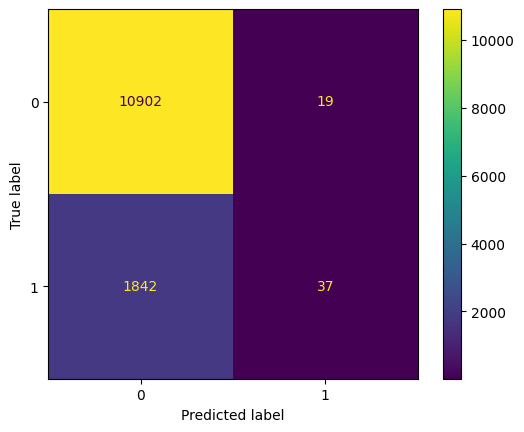

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [63]:
(10902 +37) / (10902+19+1842+37)

0.854609375

In [64]:
1842 / (1842 +37)

0.9803086748270357

In [65]:
from sklearn.metrics import recall_score, confusion_matrix

In [66]:
print(recall_score(y_test, pred_test))

0.019691325172964343


In [67]:
37 / (37+ 19)

0.6607142857142857

In [68]:
print(confusion_matrix(y_test, pred_test))

[[10902    19]
 [ 1842    37]]


In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
print(roc_auc_score(y_test, pred_test))

0.5089757788761992


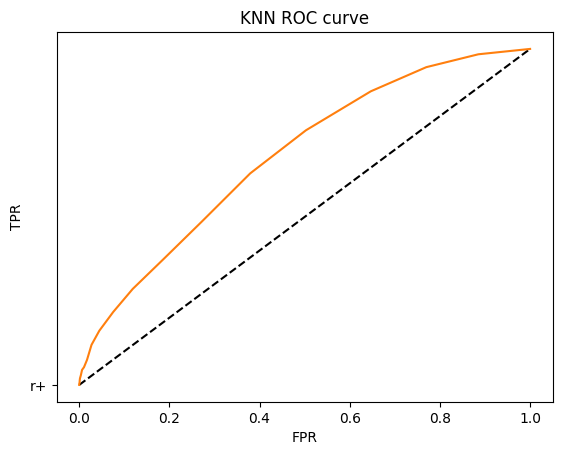

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN ROC curve')
plt.show()

# min-max, robust scaler 사용하기
# 서포트벡터 SVC 를 사용해서 분석
# 클래스 불균형 해소를 위한 데이터 증폭/축소
# RandomizedSearchCV를 이용한 SVC 하이퍼 파라미터 튜닝

In [72]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [73]:
mm = MinMaxScaler()
X_mm_scaled = mm.fit_transform(X)
rb = RobustScaler()
X_rb_scaled = rb.fit_transform(X)

In [74]:
X_mm_scaled = pd.DataFrame(X_mm_scaled, columns = X.columns)
X_mm_scaled

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.818182,0.0,0.333333,0.233533,1.0,0.0,1.0,0.0
1,0.454545,1.0,0.111111,0.169162,0.0,0.0,0.0,1.0
2,0.545455,1.0,0.259259,0.105539,1.0,0.0,0.0,1.0
3,0.727273,1.0,0.222222,0.307100,0.0,0.0,0.0,1.0
4,0.090909,0.0,0.074074,0.261477,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63995,0.818182,0.0,0.481481,0.174508,0.0,1.0,0.0,1.0
63996,0.363636,1.0,0.296296,0.248170,0.0,1.0,1.0,0.0
63997,0.454545,1.0,0.259259,0.180389,0.0,1.0,1.0,0.0
63998,0.000000,1.0,0.555556,0.154192,1.0,0.0,0.0,0.0


In [75]:
X_rb_scaled = pd.DataFrame(X_rb_scaled, columns = X.columns)
X_rb_scaled

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.571429,-1.0,0.125,0.616625,1.0,0.0,1.0,0.0
1,0.000000,0.0,-0.625,0.037417,0.0,0.0,0.0,1.0
2,0.142857,0.0,-0.125,-0.535057,1.0,0.0,0.0,1.0
3,0.428571,0.0,-0.250,1.278577,0.0,0.0,0.0,1.0
4,-0.571429,-1.0,-0.750,0.868064,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
63995,0.571429,-1.0,0.625,0.085524,0.0,1.0,0.0,1.0
63996,-0.142857,0.0,0.000,0.748331,0.0,1.0,1.0,0.0
63997,0.000000,0.0,-0.125,0.138441,0.0,1.0,1.0,0.0
63998,-0.714286,0.0,0.875,-0.097283,1.0,0.0,0.0,0.0


In [76]:
X_train_mm , X_valid_mm, y_train_mm, y_valid_mm = train_test_split(X_mm_scaled, y, test_size=0.4, random_state=100)
X_valid_mm , X_test_mm, y_valid_mm, y_test_mm = train_test_split(X_valid_mm, y_valid_mm, test_size=0.5, random_state=100)

In [77]:
X_train_rb , X_valid_rb, y_train_rb, y_valid_rb = train_test_split(X_rb_scaled, y, test_size=0.4, random_state=100)
X_valid_rb , X_test_rb, y_valid_rb, y_test_rb = train_test_split(X_valid_rb, y_valid_rb, test_size=0.5, random_state=100)

In [78]:
X_train_rb

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
2307,-0.285714,0.0,0.625,0.239466,0.0,1.0,0.0,1.0
10224,-0.571429,-1.0,-0.500,0.886024,1.0,0.0,1.0,0.0
3512,0.000000,-1.0,0.125,-0.541792,1.0,0.0,1.0,0.0
2607,-0.285714,-1.0,0.250,-0.544241,1.0,0.0,0.0,1.0
47149,-0.571429,-1.0,-0.625,0.576215,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
12119,0.285714,0.0,0.000,-0.598665,1.0,0.0,1.0,0.0
57191,0.714286,-1.0,-0.750,-0.927931,1.0,0.0,0.0,1.0
14147,-0.428571,-1.0,-0.125,1.148688,1.0,0.0,0.0,0.0
56088,0.428571,-1.0,1.250,-0.809773,1.0,0.0,1.0,0.0


In [79]:
X_valid_rb

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
46165,-0.428571,-1.0,-0.250,1.086149,1.0,0.0,1.0,0.0
61518,0.571429,0.0,0.000,0.628598,1.0,0.0,0.0,1.0
41876,-0.571429,0.0,-0.125,0.239466,1.0,0.0,0.0,1.0
59928,0.000000,-1.0,-1.000,6.974446,0.0,1.0,0.0,1.0
13465,0.571429,-1.0,1.000,-0.188403,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
61316,-0.428571,0.0,0.250,1.537480,0.0,1.0,1.0,0.0
15201,-0.714286,-1.0,-0.500,-1.323049,1.0,0.0,1.0,0.0
7940,-0.428571,-1.0,-0.250,-0.414789,0.0,1.0,1.0,0.0
10215,0.142857,0.0,0.875,0.020579,0.0,1.0,0.0,1.0


In [80]:
X_test_rb

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
60401,-0.714286,0.0,0.250,0.361920,0.0,1.0,0.0,0.0
50992,-0.714286,0.0,-0.625,-0.905481,0.0,0.0,0.0,1.0
41050,0.000000,0.0,-0.625,2.259960,0.0,1.0,0.0,1.0
14373,-0.714286,0.0,-0.500,-0.568732,0.0,1.0,1.0,0.0
29711,0.142857,0.0,1.000,-0.220097,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
59517,-0.142857,-1.0,-0.250,0.162495,0.0,1.0,1.0,0.0
19578,0.714286,0.0,-0.750,2.215060,1.0,0.0,0.0,1.0
17901,0.571429,0.0,0.250,-0.152387,0.0,1.0,1.0,0.0
15283,-0.285714,-1.0,-0.250,-0.029933,0.0,1.0,0.0,0.0


In [81]:
y_train_rb.value_counts()

conversion
0    32699
1     5701
Name: count, dtype: int64

In [82]:
from sklearn.svm import SVC

In [83]:
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', probability=True, random_state=100)
svc.fit(X_train_mm, y_train_mm)
pred_mm = svc.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred_mm))
print(classification_report(y_valid_mm, pred_mm))
print(roc_auc_score(y_valid_mm, pred_mm))

0.8559375
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10956
           1       0.00      0.00      0.00      1844

    accuracy                           0.86     12800
   macro avg       0.43      0.50      0.46     12800
weighted avg       0.73      0.86      0.79     12800

0.5


C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
pred_test_mm = svc.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred_test_mm))
print(classification_report(y_test_mm, pred_test_mm))
print(roc_auc_score(y_test_mm, pred_test_mm))

0.855546875
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10951
           1       0.00      0.00      0.00      1849

    accuracy                           0.86     12800
   macro avg       0.43      0.50      0.46     12800
weighted avg       0.73      0.86      0.79     12800

0.5


C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
X_train_rb

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
2307,-0.285714,0.0,0.625,0.239466,0.0,1.0,0.0,1.0
10224,-0.571429,-1.0,-0.500,0.886024,1.0,0.0,1.0,0.0
3512,0.000000,-1.0,0.125,-0.541792,1.0,0.0,1.0,0.0
2607,-0.285714,-1.0,0.250,-0.544241,1.0,0.0,0.0,1.0
47149,-0.571429,-1.0,-0.625,0.576215,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
12119,0.285714,0.0,0.000,-0.598665,1.0,0.0,1.0,0.0
57191,0.714286,-1.0,-0.750,-0.927931,1.0,0.0,0.0,1.0
14147,-0.428571,-1.0,-0.125,1.148688,1.0,0.0,0.0,0.0
56088,0.428571,-1.0,1.250,-0.809773,1.0,0.0,1.0,0.0


In [85]:
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', probability=True, random_state=100)
svc.fit(X_train_rb, y_train_rb)
pred_rb = svc.predict(X_valid_rb)
print(accuracy_score(y_valid_rb, pred_rb))
print(classification_report(y_valid_rb, pred_rb))
print(roc_auc_score(y_valid_rb, pred_rb))

0.85609375
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10956
           1       1.00      0.00      0.00      1844

    accuracy                           0.86     12800
   macro avg       0.93      0.50      0.46     12800
weighted avg       0.88      0.86      0.79     12800

0.5005422993492408


In [86]:
pred_test_rb = svc.predict(X_test_rb)
print(accuracy_score(y_test_rb, pred_test_rb))
print(classification_report(y_test_rb, pred_test_rb))
print(roc_auc_score(y_test_rb, pred_test_rb))

0.85578125
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10951
           1       1.00      0.00      0.00      1849

    accuracy                           0.86     12800
   macro avg       0.93      0.50      0.46     12800
weighted avg       0.88      0.86      0.79     12800

0.5008112493239589


In [96]:
X_train_mm

,recency,is_referral,num_item,mean_amount,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
2307,0.272727,1.0,0.481481,0.191617,0.0,1.0,0.0,1.0
10224,0.090909,0.0,0.148148,0.263473,1.0,0.0,1.0,0.0
3512,0.454545,0.0,0.333333,0.104790,1.0,0.0,1.0,0.0
2607,0.272727,0.0,0.370370,0.104518,1.0,0.0,0.0,1.0
47149,0.090909,0.0,0.111111,0.229042,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
12119,0.636364,1.0,0.296296,0.098470,1.0,0.0,1.0,0.0
57191,0.909091,0.0,0.074074,0.061876,1.0,0.0,0.0,1.0
14147,0.181818,0.0,0.259259,0.292665,1.0,0.0,0.0,0.0
56088,0.727273,0.0,0.666667,0.075008,1.0,0.0,1.0,0.0


In [93]:
from imblearn.over_sampling import SMOTENC

In [97]:
kms = SMOTENC(categorical_features=['zip_code_Surburban','zip_code_Urban','channel_Phone','channel_Web'], random_state=777, k_neighbors=5, n_jobs=-1)
X_train_mm_kms, y_train_mm_kms = kms.fit_resample(X_train_mm, y_train_mm)

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\imblearn\over_sampling\_smote\base.py:645: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [98]:
print(len(X_train_mm_kms), len(y_train_mm_kms))
print(y_train_mm_kms.value_counts())

65398 65398
conversion
0    32699
1    32699
Name: count, dtype: int64


In [99]:
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', probability=True, random_state=100)
svc.fit(X_train_mm_kms, y_train_mm_kms)
pred_mm = svc.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred_mm))
print(classification_report(y_valid_mm, pred_mm))
print(roc_auc_score(y_valid_mm, pred_mm))
pred_test_mm = svc.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred_test_mm))
print(classification_report(y_test_mm, pred_test_mm))
print(roc_auc_score(y_test_mm, pred_test_mm))

0.591875
              precision    recall  f1-score   support

           0       0.92      0.57      0.71     10956
           1       0.22      0.71      0.33      1844

    accuracy                           0.59     12800
   macro avg       0.57      0.64      0.52     12800
weighted avg       0.82      0.59      0.65     12800

0.6393640030443208
0.594453125
              precision    recall  f1-score   support

           0       0.92      0.58      0.71     10951
           1       0.22      0.70      0.33      1849

    accuracy                           0.59     12800
   macro avg       0.57      0.64      0.52     12800
weighted avg       0.82      0.59      0.65     12800

0.6386982249806515


In [101]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_mm_kms, y_train_mm_kms)
pred = knn.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred))
print(classification_report(y_valid_mm, pred))
print("="*50, "test", "="*50)
pred_test = knn.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred_test))
print(classification_report(y_test_mm, pred_test))

0.663828125
              precision    recall  f1-score   support

           0       0.89      0.70      0.78     10956
           1       0.21      0.48      0.29      1844

    accuracy                           0.66     12800
   macro avg       0.55      0.59      0.53     12800
weighted avg       0.79      0.66      0.71     12800

================================================== test ==================================================
0.66921875
              precision    recall  f1-score   support

           0       0.88      0.71      0.78     10951
           1       0.21      0.46      0.28      1849

    accuracy                           0.67     12800
   macro avg       0.55      0.58      0.53     12800
weighted avg       0.79      0.67      0.71     12800



In [105]:
knn_params = dict(n_neighbors=[3, 5, 7, 10], weights=['uniform', 'distance'],
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'],
                  leaf_size=[30, 50, 70, 100], 
                  metric=['minkowski', 'euclidean', 'manhattan'],
                  n_jobs=[-1])

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
rand_cv = RandomizedSearchCV(knn, param_distributions=knn_params, n_iter=50, n_jobs=-1, refit=True, cv=3, verbose=3, pre_dispatch='2*n_jobs', random_state=77)
rand_cv.fit(X_train_mm_kms, y_train_mm_kms)
pred = rand_cv.predict(X_valid_mm)
print("best_params: ", rand_cv.best_params_)
print("best_score: ", rand_cv.score(X_valid_mm))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
best_params:  {'weights': 'distance', 'n_neighbors': 3, 'n_jobs': -1, 'metric': 'manhattan', 'leaf_size': 70, 'algorithm': 'ball_tree'}


InvalidParameterError: The 'y_true' parameter of accuracy_score must be an array-like or a sparse matrix. Got None instead.

In [110]:
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 3, n_jobs= -1, metric= 'manhattan', leaf_size= 70, algorithm= 'ball_tree')
knn.fit(X_train_mm_kms, y_train_mm_kms)
pred = knn.predict(X_valid_mm)
print(accuracy_score(y_valid_mm, pred))
print(classification_report(y_valid_mm, pred))
print("="*50, "test", "="*50)
pred_test = knn.predict(X_test_mm)
print(accuracy_score(y_test_mm, pred_test))
print(classification_report(y_test_mm, pred_test))

0.730625
              precision    recall  f1-score   support

           0       0.87      0.80      0.84     10956
           1       0.21      0.32      0.25      1844

    accuracy                           0.73     12800
   macro avg       0.54      0.56      0.55     12800
weighted avg       0.78      0.73      0.75     12800

================================================== test ==================================================
0.734296875
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     10951
           1       0.21      0.31      0.25      1849

    accuracy                           0.73     12800
   macro avg       0.54      0.56      0.54     12800
weighted avg       0.78      0.73      0.75     12800

